C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,쇼핑,식도락관광,자연경관감상,테마파크,전통문화체험,뷰티관광,스포츠활동,연령_인코딩,cluster
0,80.30,51.20,27.92,12.34,6.90,2.83,3.05,0,0
1,78.84,52.89,30.16,9.96,5.52,3.89,2.68,1,0
2,71.84,48.93,30.19,8.13,4.34,3.69,1.85,2,0
3,62.45,39.30,29.02,6.58,4.97,2.54,1.90,3,0
4,53.25,33.48,29.24,4.05,5.93,2.21,1.15,4,0
5,60.23,37.95,36.24,3.95,3.81,2.52,2.63,5,0
6,68.40,54.93,19.09,3.84,4.63,9.07,1.19,6,0
7,81.09,52.82,25.07,17.71,6.29,2.53,2.70,0,0
8,82.33,57.24,29.73,11.50,5.33,3.73,2.22,1,0
9,78.21,50.72,27.51,10.93,4.36,3.04,1.89,2,0


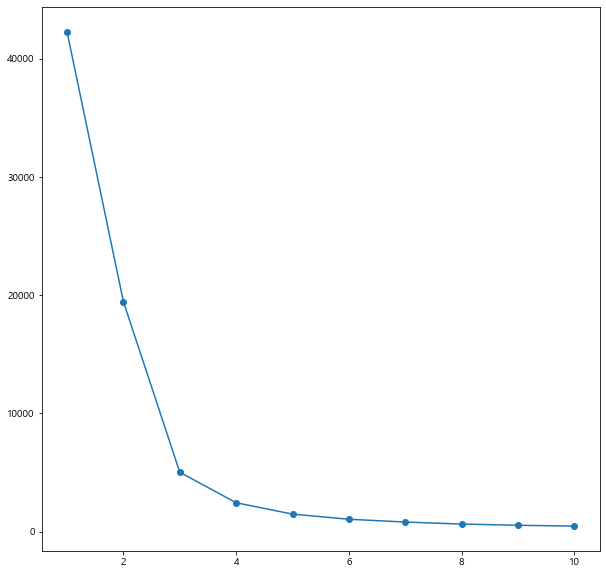

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


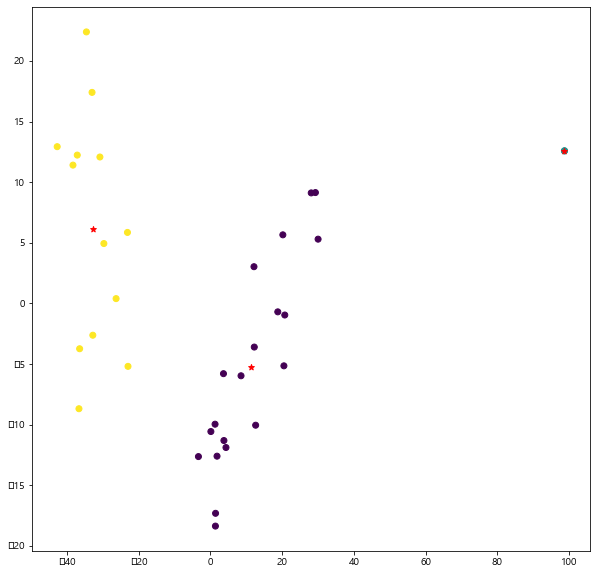

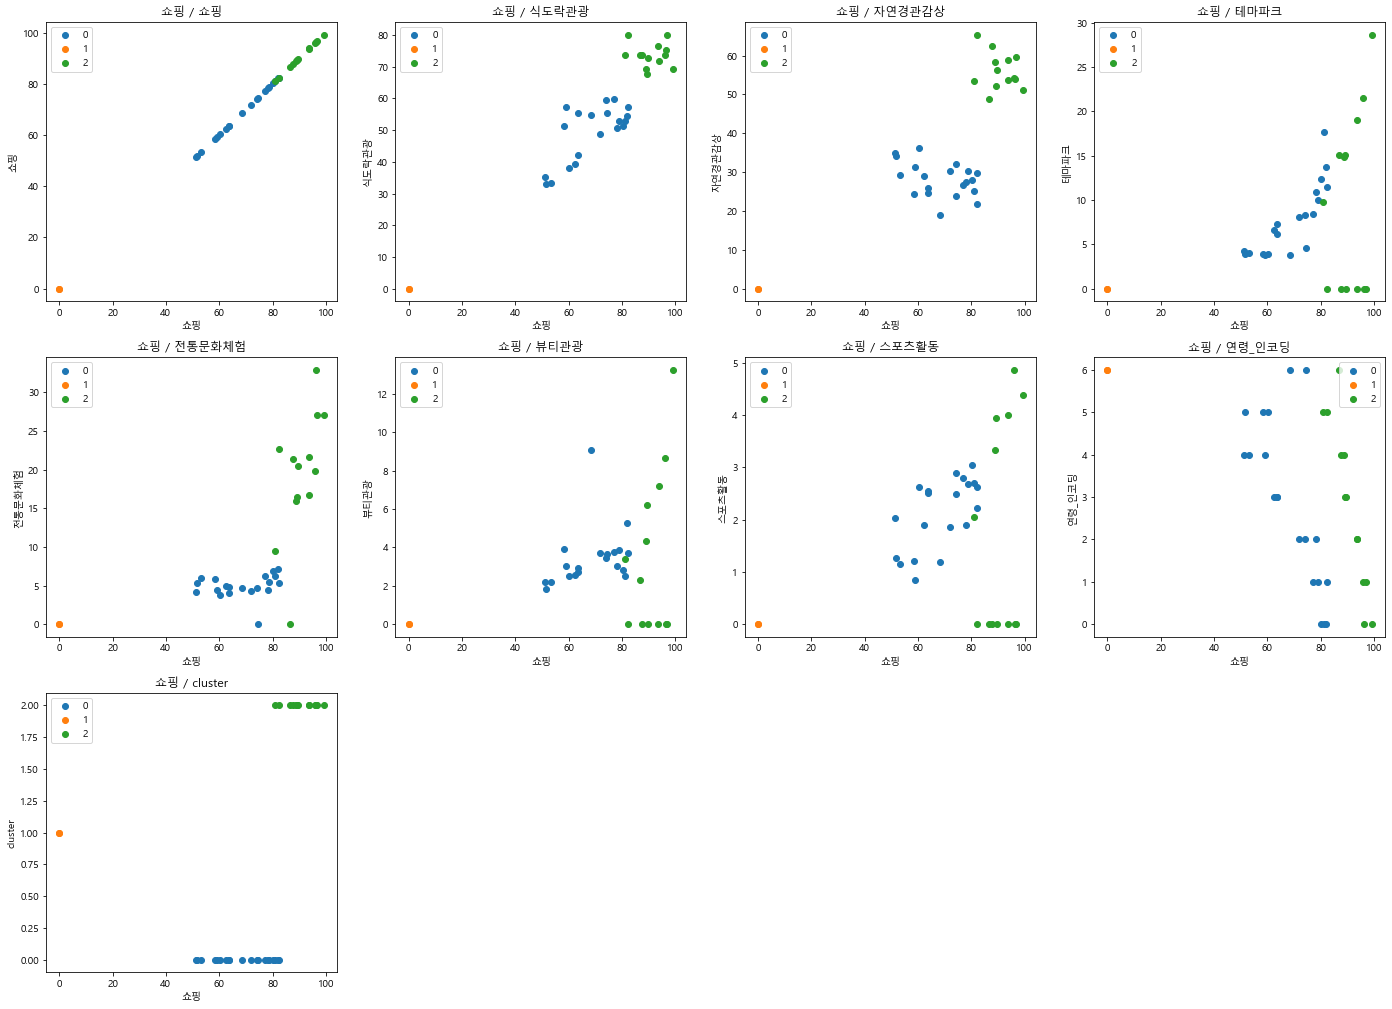

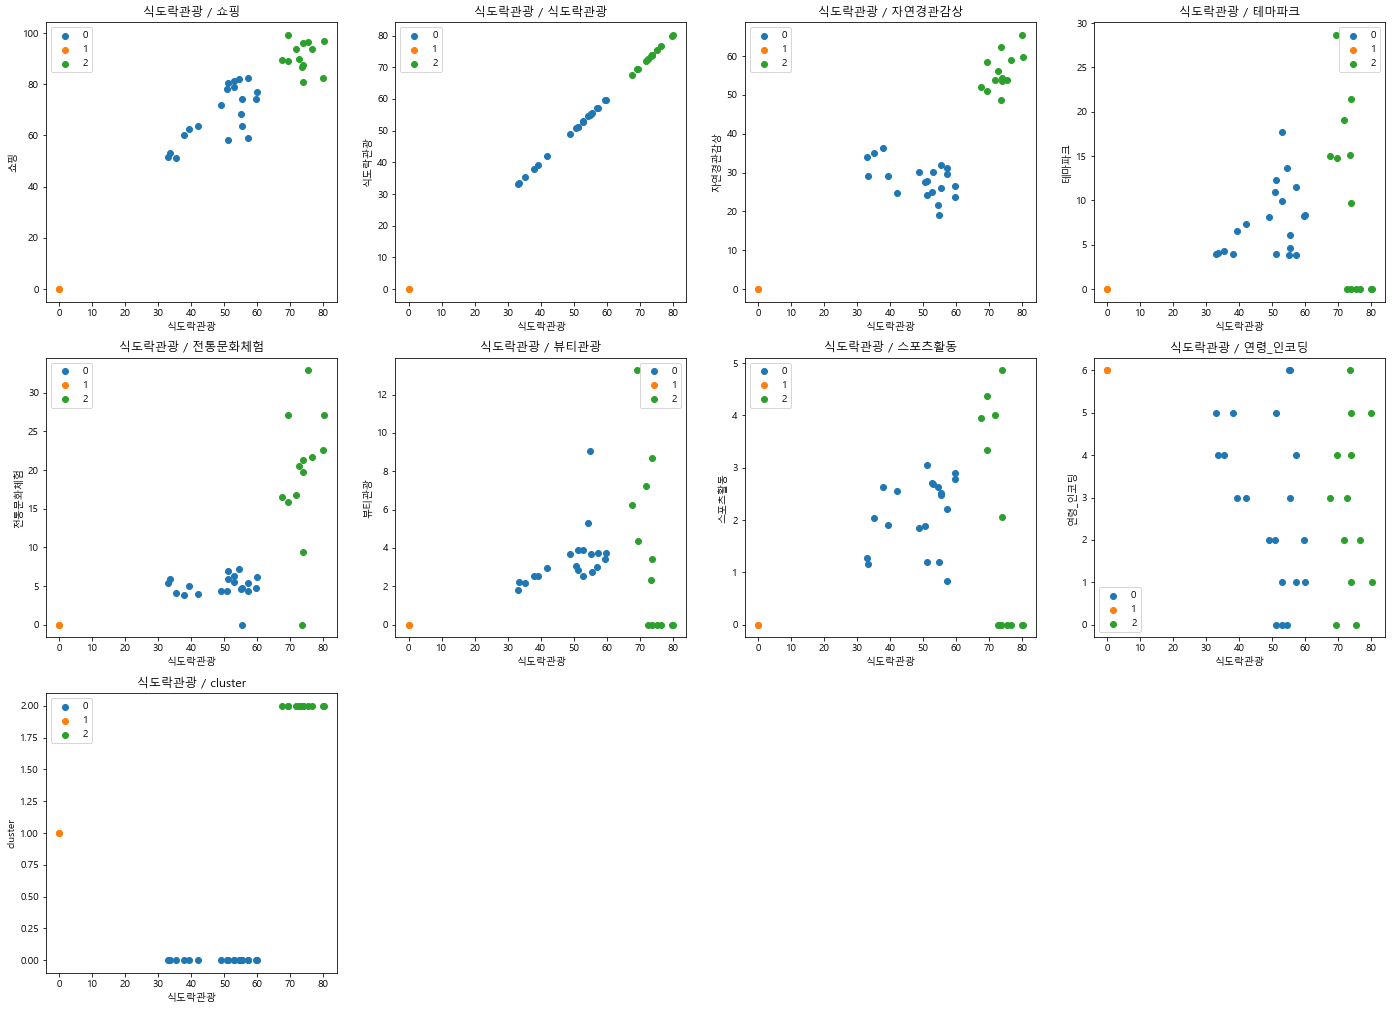

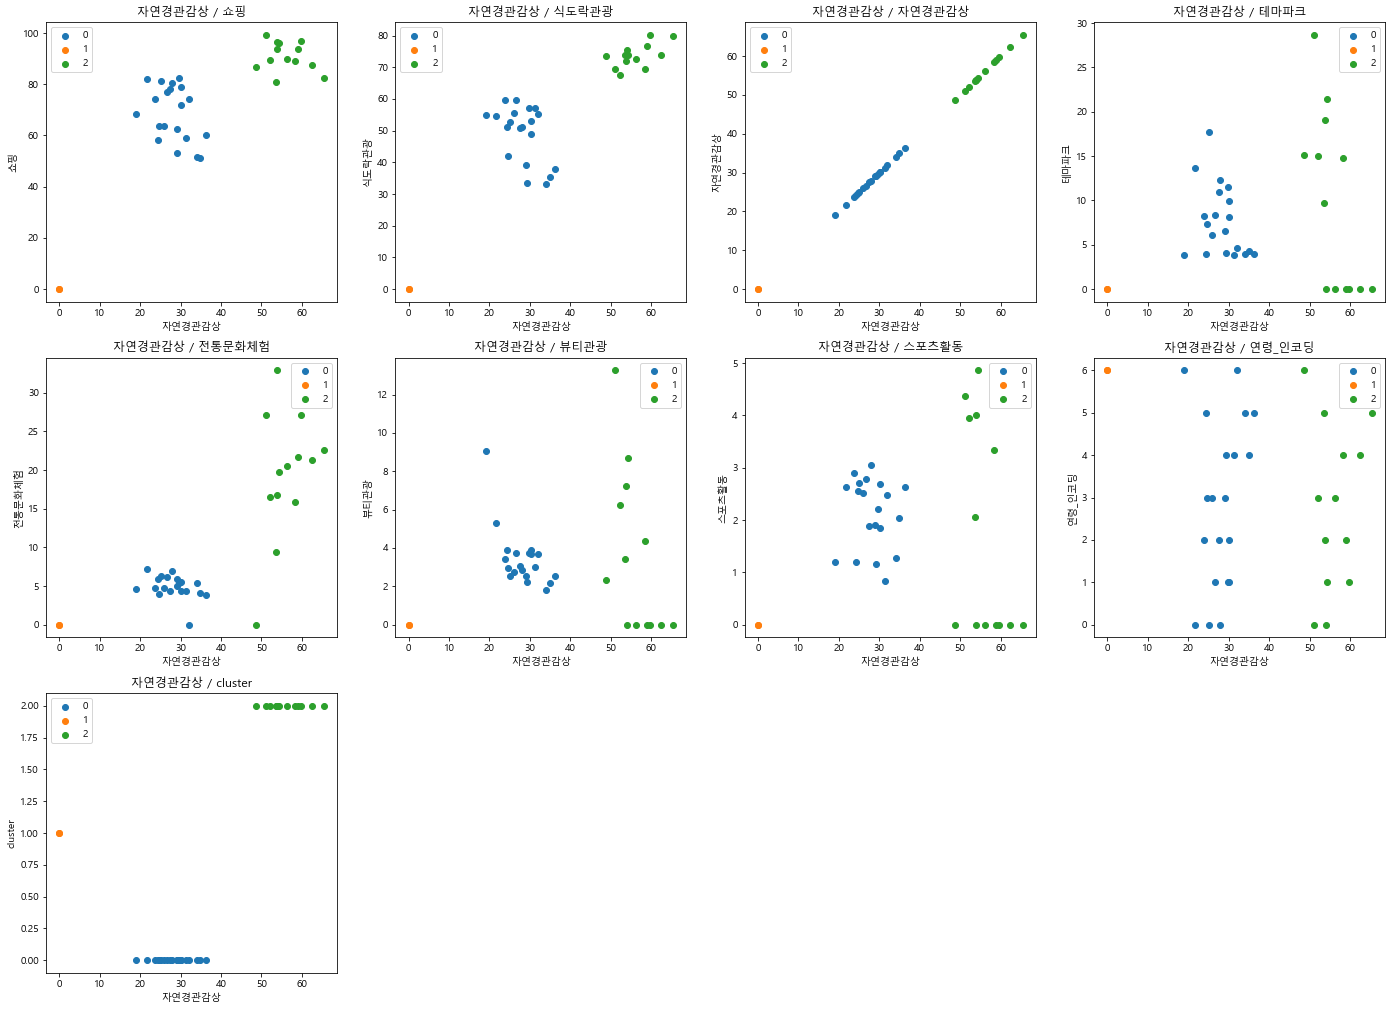

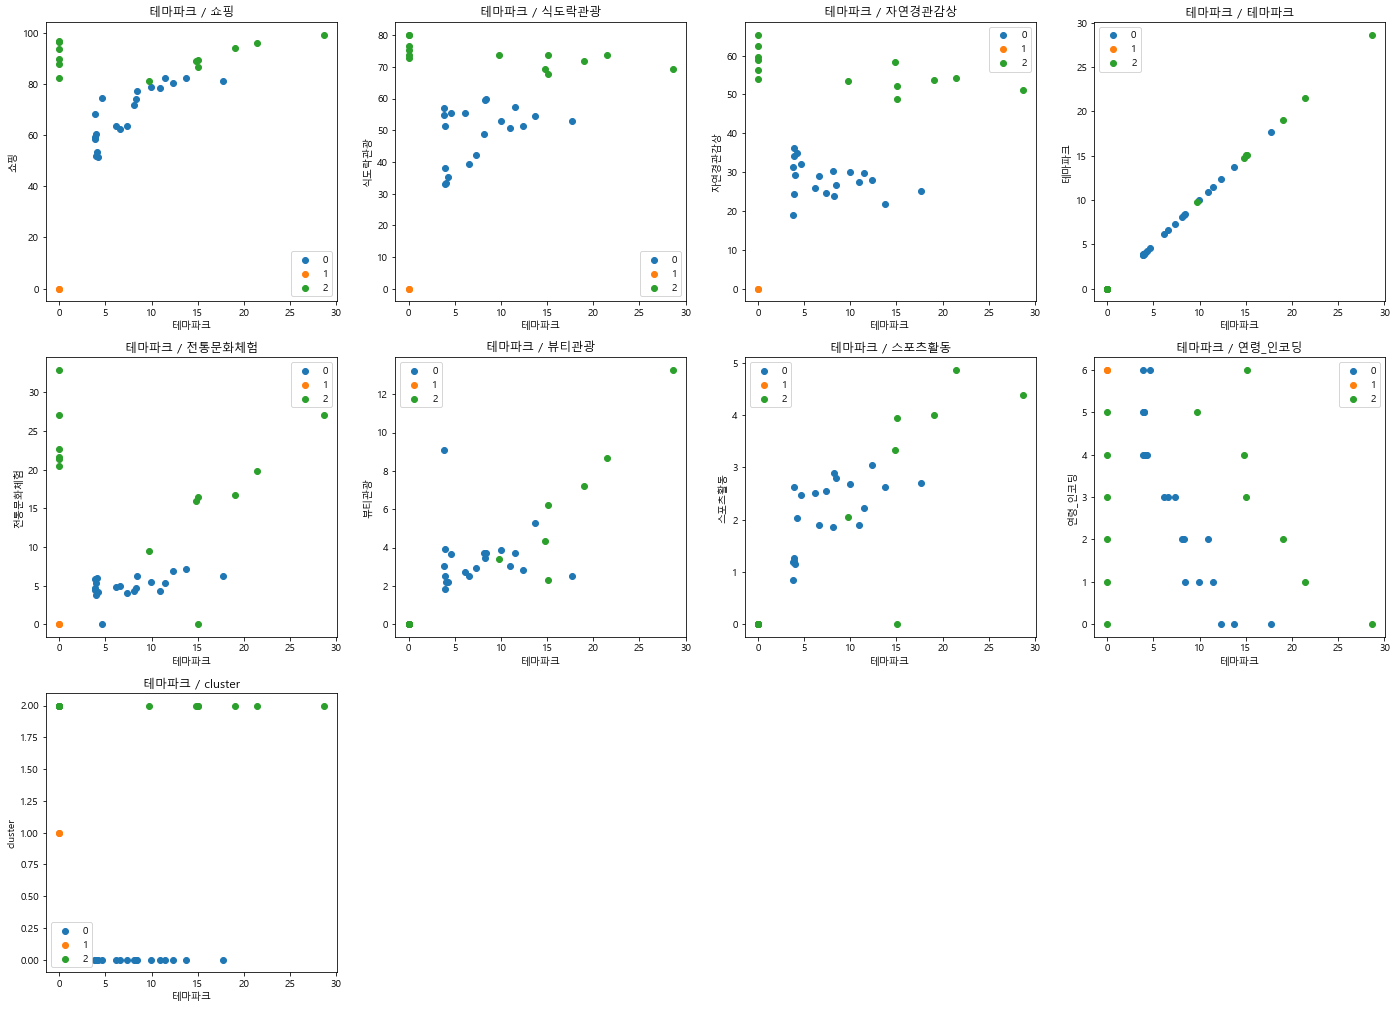

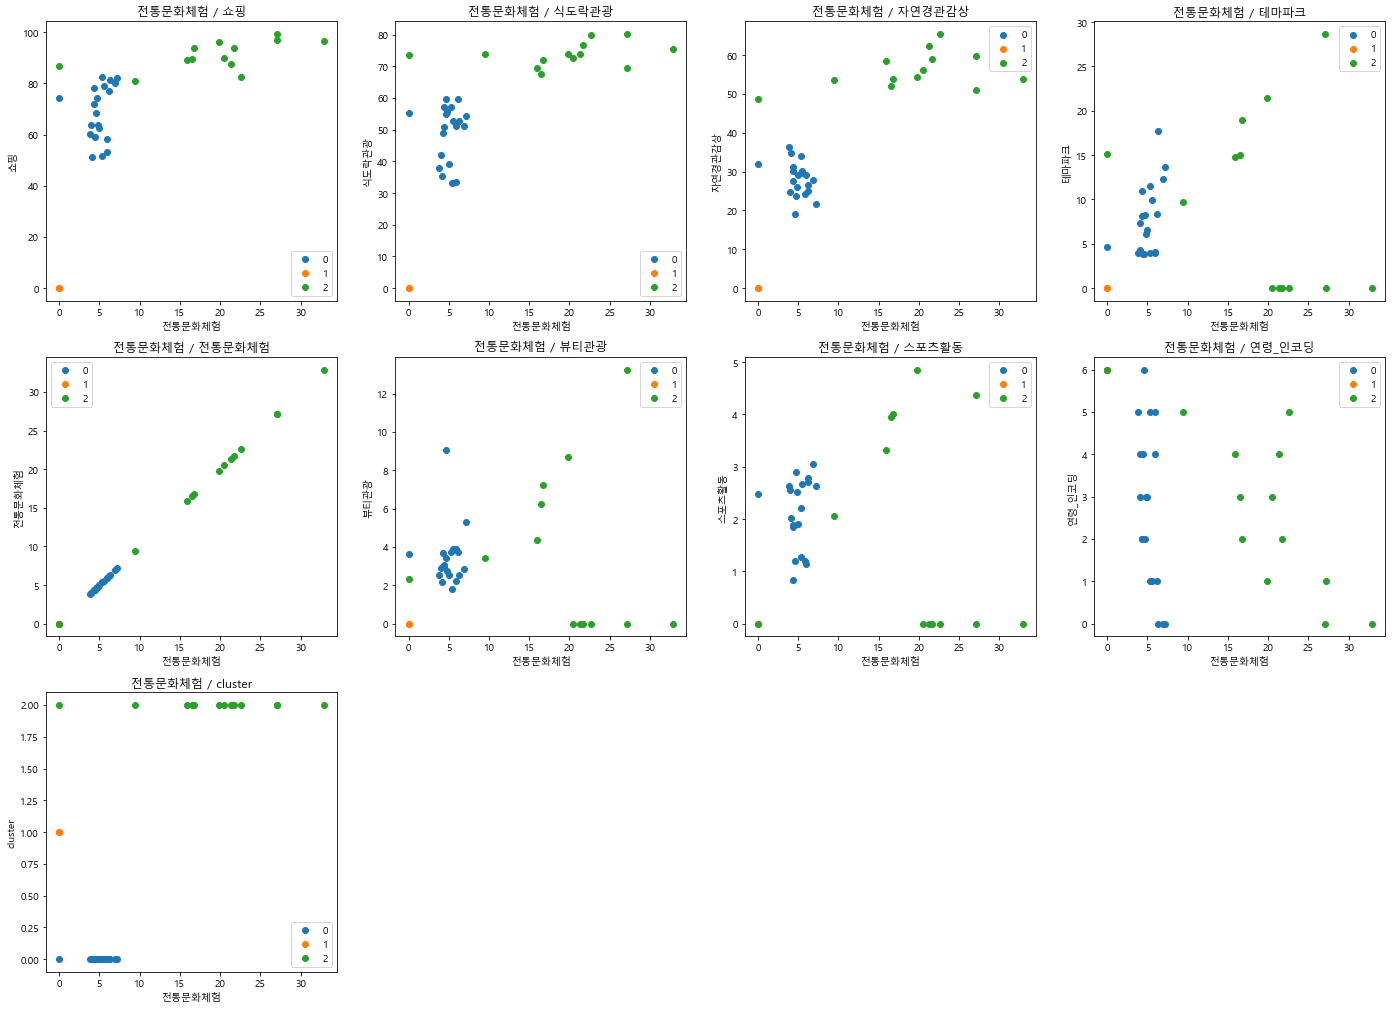

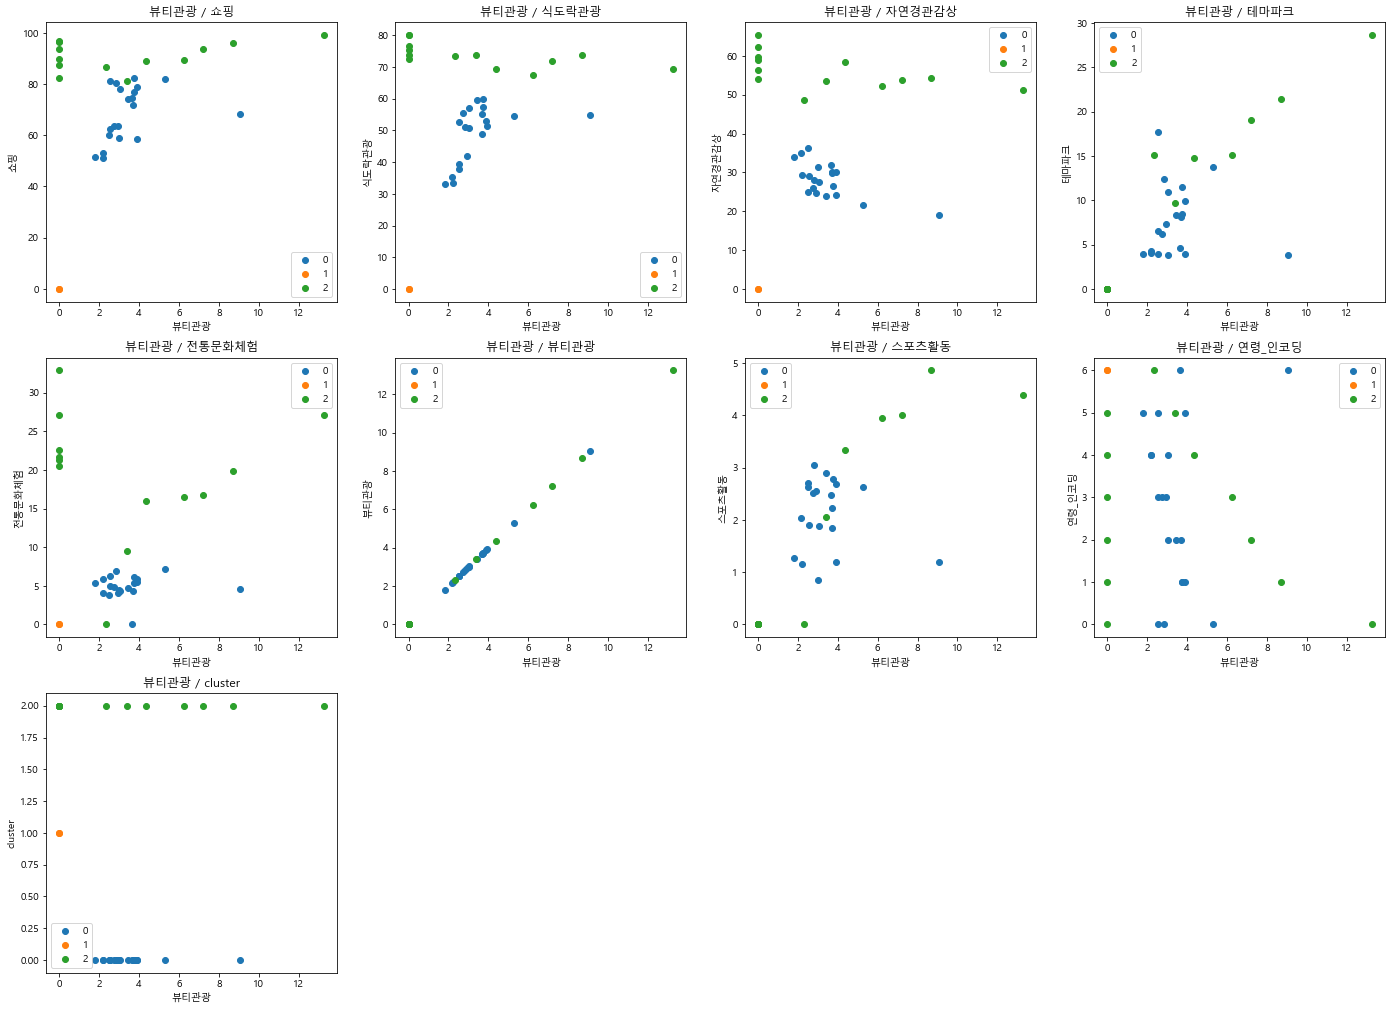

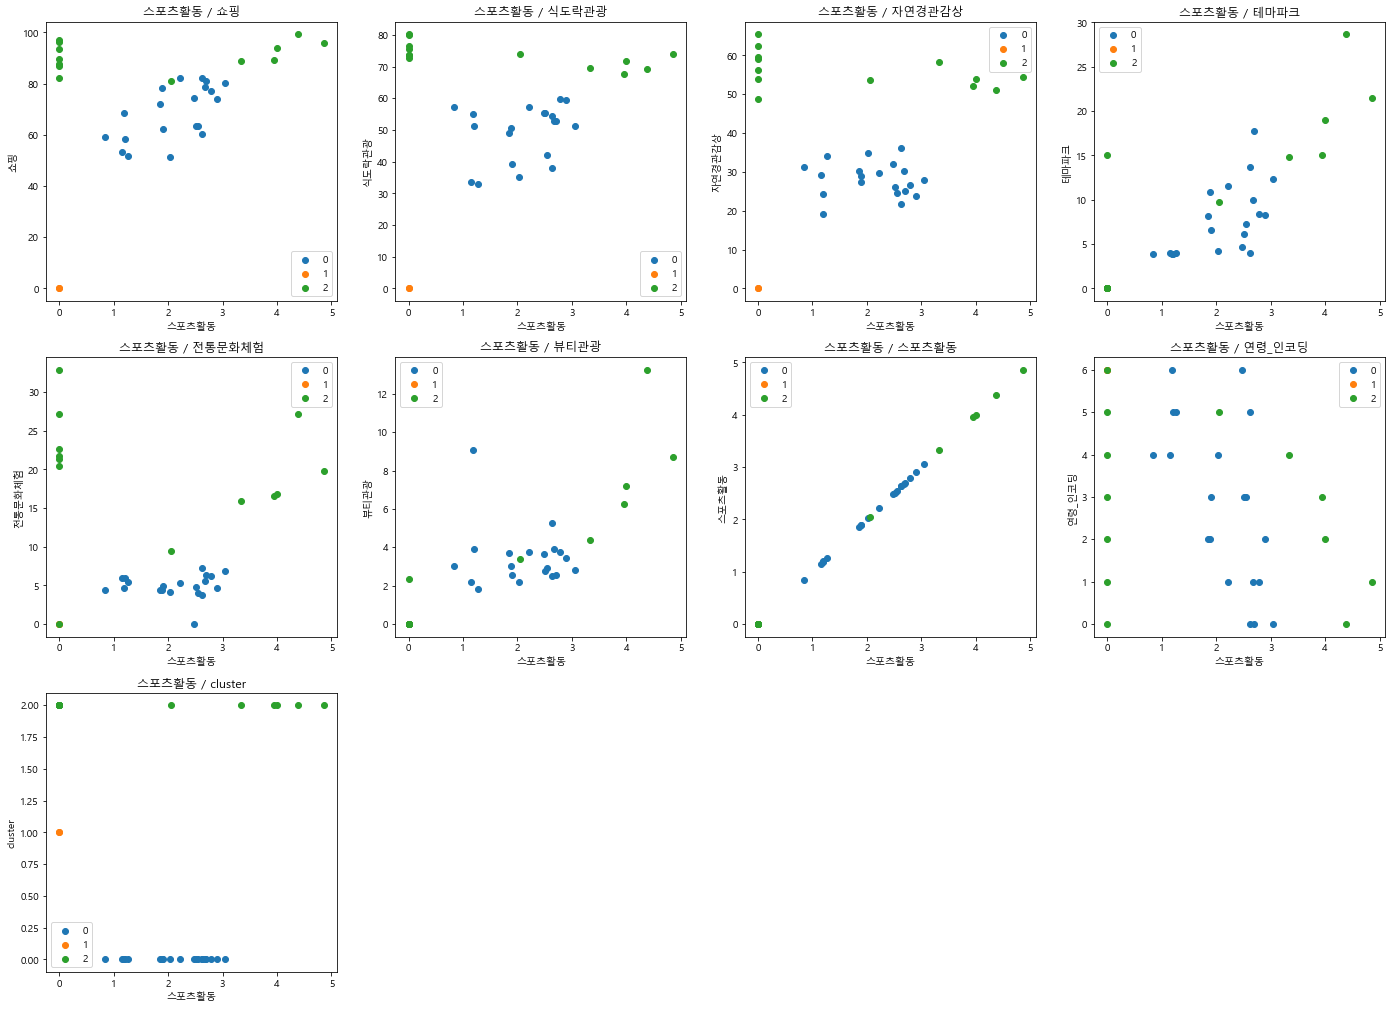

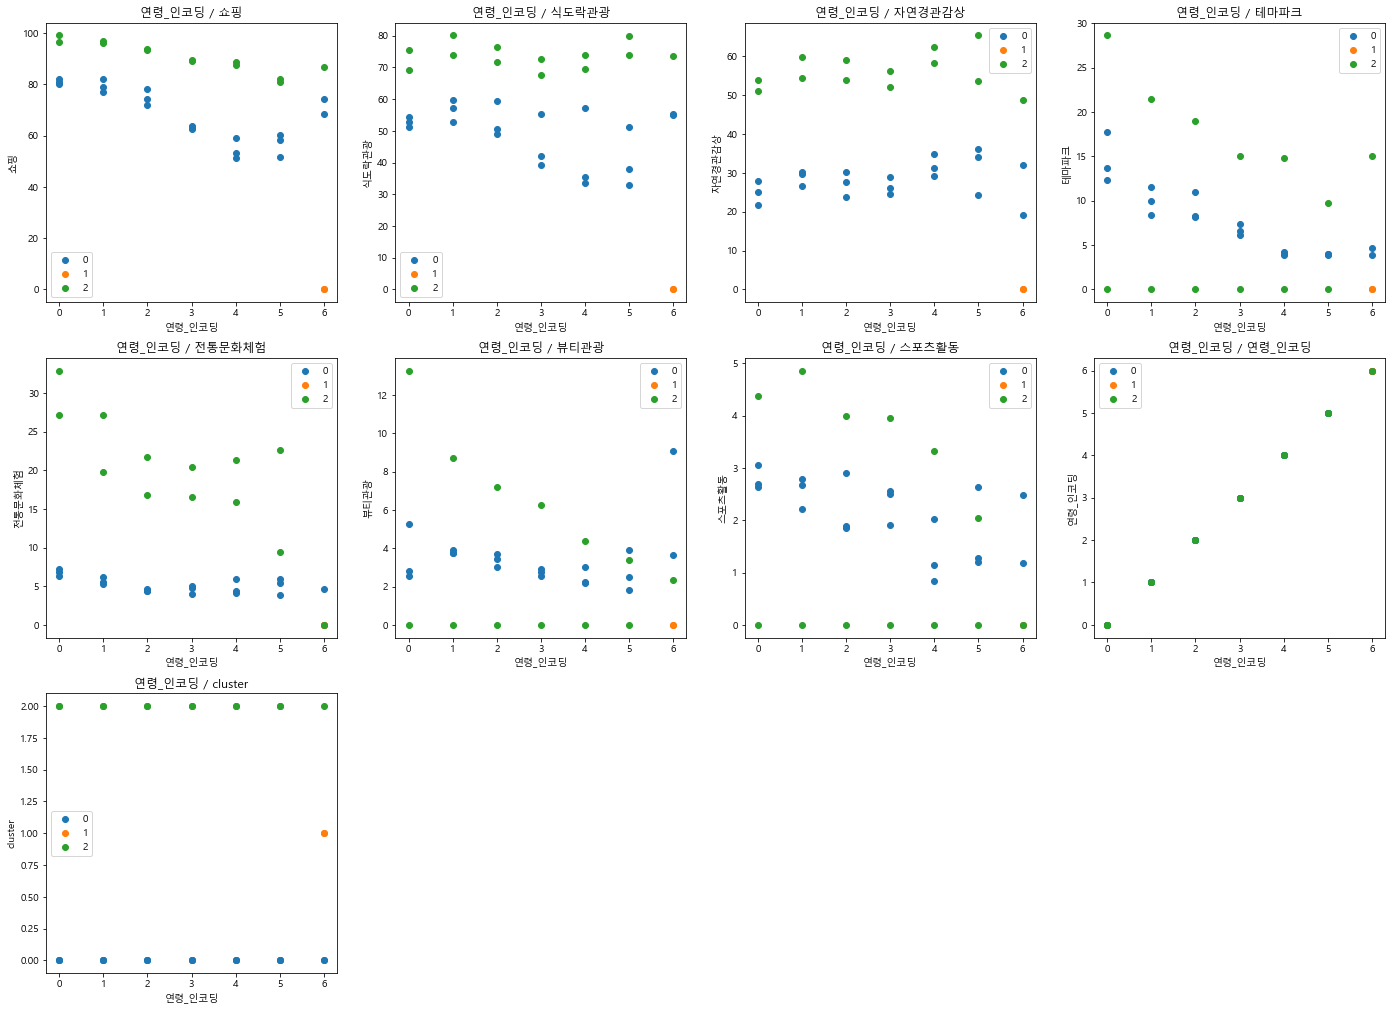

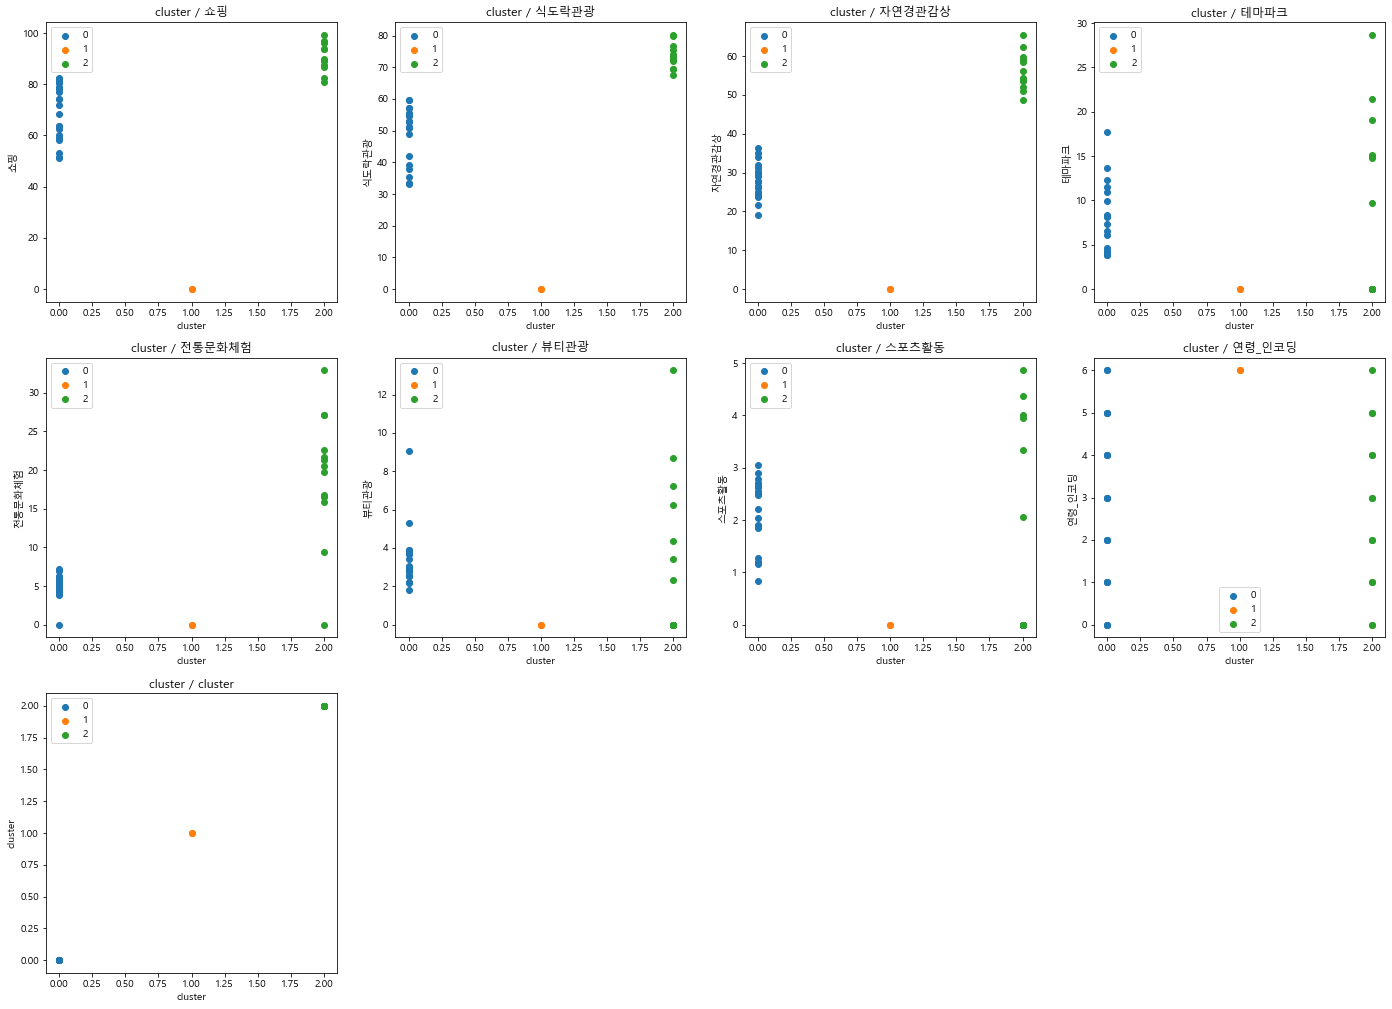

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('./Data/외래관광객_연령별_여행참여(전처리).csv')

corr = df.corr()

# plt.figure(figsize=(20,20))
# sns.heatmap(corr, annot=True)

# corr['쇼핑'].value_c\ounts
# 쇼핑, 식도락관광, 자연경관감상, 테마파크, 전통문화체험, 뷰티관광, 스포츠활동

col = ['쇼핑', '식도락관광', '자연경관감상', '테마파크', '전통문화체험', '뷰티관광', '스포츠활동']

df_c = df[col]

df_c = df_c.fillna(0)

encoder = LabelEncoder()
df_c['연령_인코딩'] = encoder.fit_transform(df['연령'])


pca = PCA(n_components=2)
transform = pca.fit_transform(df_c)

transform

inertias = []
for i in range(1, 11):
    temp = KMeans(n_clusters=i)
    temp.fit(transform)
    inertias.append(temp.inertia_)

plt.figure(figsize=(10,10))
plt.plot(range(1, 11), inertias, '-o')


model = KMeans(n_clusters=3)
model.fit(transform)
df_c['cluster'] = model.labels_
center = model.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(transform[:,0], transform[:,1], c=df_c['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker="*")

col = df_c.columns

for i in col:
    plt.figure(figsize=(24,36))
    cnt = 1
    for k in col:
        plt.subplot(6,4,cnt)
        for j in range(3):
            plt.scatter(df_c[df_c['cluster'] == j][f'{i}'], df_c[df_c['cluster'] == j][f'{k}'], label=f'{j}')
        plt.title(f'{i} / {k}')
        plt.xlabel(f'{i}')
        plt.ylabel(f'{k}')
        plt.legend()
        cnt += 1

df_c